3stars: v6
Chosen n_components: 2
Weights: [0.391 0.609]
Mean:  2.4220551389157627
Means: [3.333 1.837]
Std devs: [0.918 0.545]


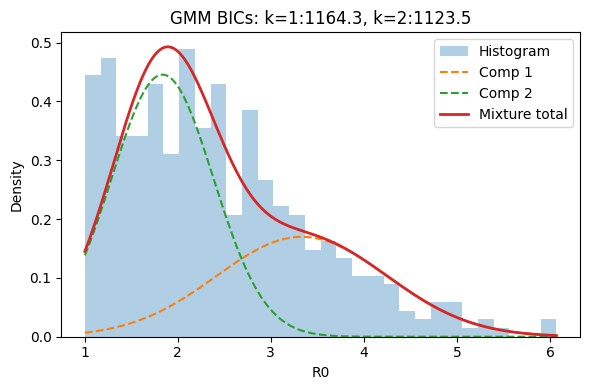

Chosen n_components: 2
Weights: [0.572 0.428]
Mean:  0.47688122294832447
Means: [0.303 0.709]
Std devs: [0.141 0.16 ]


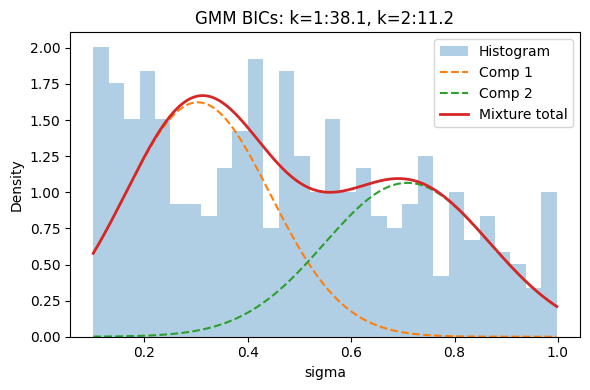

Chosen n_components: 3
Weights: [0.363 0.329 0.308]
Mean:  0.2636219228352546
Means: [0.121 0.415 0.27 ]
Std devs: [0.046 0.05  0.05 ]


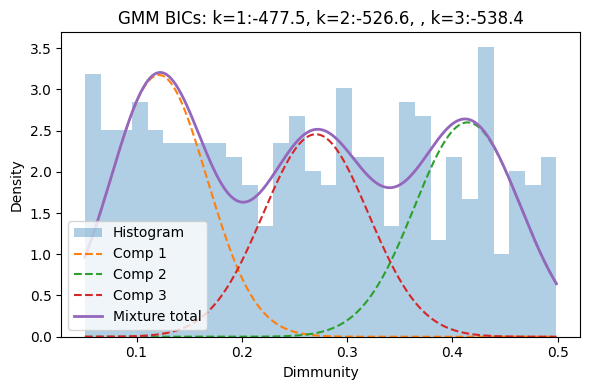

Chosen n_components: 2
Weights: [0.428 0.572]
Mean:  0.6014599826892361
Means: [0.366 0.778]
Std devs: [0.148 0.153]


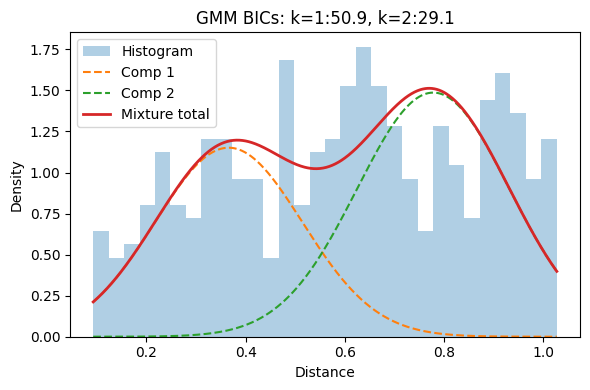

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
R0_samps = np.loadtxt("./experimental_data/R0_samps_3params_3stars_v9_ud3.csv", delimiter=",")


x = np.asarray(R0_samps)

x = x[~np.isnan(x)]
X = x.reshape(-1, 1)

# Try 1 vs 2 components and pick best by BIC
bics, gms = [], []
for k in [1, 2]:
    gm = GaussianMixture(n_components=k, covariance_type="full", random_state=0).fit(X)
    bics.append(gm.bic(X)); gms.append(gm)

print("3stars: v6")
best = gms[int(np.argmin(bics))]
print("Chosen n_components:", best.n_components)
print("Weights:", np.round(best.weights_, 3))
print("Mean: ", np.mean(x))
print("Means:", np.round(best.means_.ravel(), 3))
print("Std devs:", np.round(np.sqrt(best.covariances_.ravel()), 3))

# Plot histogram + total mixture pdf + each component
xs = np.linspace(x.min(), x.max(), 600).reshape(-1, 1)
from scipy.stats import norm
pdf_total = np.zeros_like(xs.ravel())
comp_pdfs = []
for w, m, v in zip(best.weights_, best.means_.ravel(), best.covariances_.ravel()):
    comp_pdf = w * norm.pdf(xs.ravel(), loc=m, scale=np.sqrt(v))
    comp_pdfs.append(comp_pdf)
    pdf_total += comp_pdf

plt.figure(figsize=(6,4))
plt.hist(x, bins=30, density=True, alpha=0.35, label="Histogram")
for i, cp in enumerate(comp_pdfs, 1):
    plt.plot(xs.ravel(), cp, lw=1.5, linestyle="--", label=f"Comp {i}")
plt.plot(xs.ravel(), pdf_total, lw=2, label="Mixture total")
plt.title(f"GMM BICs: k=1:{bics[0]:.1f}, k=2:{bics[1]:.1f}")
plt.xlabel("R0"); plt.ylabel("Density"); plt.legend(); plt.tight_layout(); plt.show()




sigma_samps = np.loadtxt("./experimental_data/sigma_samps_3params_3stars_v9_ud3.csv", delimiter=",")


x = np.asarray(sigma_samps)

x = x[~np.isnan(x)]
X = x.reshape(-1, 1)

# Try 1 vs 2 components and pick best by BIC
bics, gms = [], []
for k in [1, 2]:
    gm = GaussianMixture(n_components=k, covariance_type="full", random_state=0).fit(X)
    bics.append(gm.bic(X)); gms.append(gm)

best = gms[int(np.argmin(bics))]
print("Chosen n_components:", best.n_components)
print("Weights:", np.round(best.weights_, 3))
print("Mean: ", np.mean(x))
print("Means:", np.round(best.means_.ravel(), 3))
print("Std devs:", np.round(np.sqrt(best.covariances_.ravel()), 3))

# Plot histogram + total mixture pdf + each component
xs = np.linspace(x.min(), x.max(), 600).reshape(-1, 1)
from scipy.stats import norm
pdf_total = np.zeros_like(xs.ravel())
comp_pdfs = []
for w, m, v in zip(best.weights_, best.means_.ravel(), best.covariances_.ravel()):
    comp_pdf = w * norm.pdf(xs.ravel(), loc=m, scale=np.sqrt(v))
    comp_pdfs.append(comp_pdf)
    pdf_total += comp_pdf

plt.figure(figsize=(6,4))
plt.hist(x, bins=30, density=True, alpha=0.35, label="Histogram")
for i, cp in enumerate(comp_pdfs, 1):
    plt.plot(xs.ravel(), cp, lw=1.5, linestyle="--", label=f"Comp {i}")
plt.plot(xs.ravel(), pdf_total, lw=2, label="Mixture total")
plt.title(f"GMM BICs: k=1:{bics[0]:.1f}, k=2:{bics[1]:.1f}")
plt.xlabel("sigma"); plt.ylabel("Density"); plt.legend(); plt.tight_layout(); plt.show()


Dimmunity_samps = np.loadtxt("./experimental_data/Dimmunity_samps_3params_3stars_v9_ud3.csv", delimiter=",")


x = np.asarray(Dimmunity_samps)

x = x[~np.isnan(x)]
X = x.reshape(-1, 1)

# Try 1 vs 2 components and pick best by BIC
bics, gms = [], []
for k in [1, 2, 3]:
    gm = GaussianMixture(n_components=k, covariance_type="full", random_state=0).fit(X)
    bics.append(gm.bic(X)); gms.append(gm)

best = gms[int(np.argmin(bics))]
print("Chosen n_components:", best.n_components)
print("Weights:", np.round(best.weights_, 3))
print("Mean: ", np.mean(x))
print("Means:", np.round(best.means_.ravel(), 3))
print("Std devs:", np.round(np.sqrt(best.covariances_.ravel()), 3))

# Plot histogram + total mixture pdf + each component
xs = np.linspace(x.min(), x.max(), 600).reshape(-1, 1)
from scipy.stats import norm
pdf_total = np.zeros_like(xs.ravel())
comp_pdfs = []
for w, m, v in zip(best.weights_, best.means_.ravel(), best.covariances_.ravel()):
    comp_pdf = w * norm.pdf(xs.ravel(), loc=m, scale=np.sqrt(v))
    comp_pdfs.append(comp_pdf)
    pdf_total += comp_pdf

plt.figure(figsize=(6,4))
plt.hist(x, bins=30, density=True, alpha=0.35, label="Histogram")
for i, cp in enumerate(comp_pdfs, 1):
    plt.plot(xs.ravel(), cp, lw=1.5, linestyle="--", label=f"Comp {i}")
plt.plot(xs.ravel(), pdf_total, lw=2, label="Mixture total")
plt.title(f"GMM BICs: k=1:{bics[0]:.1f}, k=2:{bics[1]:.1f}, , k=3:{bics[2]:.1f}")
plt.xlabel("Dimmunity"); plt.ylabel("Density"); plt.legend(); plt.tight_layout(); plt.show()


Dimmunity_samps = np.loadtxt("./experimental_data/dists_acc_3params_3stars_v9_ud3.csv", delimiter=",")


x = np.asarray(Dimmunity_samps)

x = x[~np.isnan(x)]
X = x.reshape(-1, 1)

# Try 1 vs 2 components and pick best by BIC
bics, gms = [], []
for k in [1, 2]:
    gm = GaussianMixture(n_components=k, covariance_type="full", random_state=0).fit(X)
    bics.append(gm.bic(X)); gms.append(gm)

best = gms[int(np.argmin(bics))]
print("Chosen n_components:", best.n_components)
print("Weights:", np.round(best.weights_, 3))
print("Mean: ", np.mean(x))
print("Means:", np.round(best.means_.ravel(), 3))
print("Std devs:", np.round(np.sqrt(best.covariances_.ravel()), 3))

# Plot histogram + total mixture pdf + each component
xs = np.linspace(x.min(), x.max(), 600).reshape(-1, 1)
from scipy.stats import norm
pdf_total = np.zeros_like(xs.ravel())
comp_pdfs = []
for w, m, v in zip(best.weights_, best.means_.ravel(), best.covariances_.ravel()):
    comp_pdf = w * norm.pdf(xs.ravel(), loc=m, scale=np.sqrt(v))
    comp_pdfs.append(comp_pdf)
    pdf_total += comp_pdf

plt.figure(figsize=(6,4))
plt.hist(x, bins=30, density=True, alpha=0.35, label="Histogram")
for i, cp in enumerate(comp_pdfs, 1):
    plt.plot(xs.ravel(), cp, lw=1.5, linestyle="--", label=f"Comp {i}")
plt.plot(xs.ravel(), pdf_total, lw=2, label="Mixture total")
plt.title(f"GMM BICs: k=1:{bics[0]:.1f}, k=2:{bics[1]:.1f}")
plt.xlabel("Distance"); plt.ylabel("Density"); plt.legend(); plt.tight_layout(); plt.show()
